#Phase margin demo
<br>
This notebook is designed to make the students learn about the phase margin of a proportional controller.
<br>
<br>It will show how to calculate the phase margin with a Bode plot and Nyquist diagram. 
<br>


<img src='feedback_pitch2.png'>    

In [9]:
from control import*
from matplotlib import*
from pylab import*
from math import*
import numpy as np
###This are the imported packages, control is not a standard package of Anaconda.


<br>The phase margin is the difference between the angle at the the frequency at which the magnitude
<br>
<br>is equal to $0$ dB(= when $|P(jw_0)C(jw_0)|=1$) and $-180°$. For $H(s)= \frac{1}{s^2+s}$ is this for example $52°$
<br>
<br>You can see this on the Bode plot and on the Nyquist plot.
<br>
<br>On the Bode plot you just look at what frequency the magnitude plot is $0$ and see what the difference is
<br>
<br>between the angle at that frequency and $-180°$.
<br> 
<br>At the Nyquist plot you calculate the argument that the Nyquist diagram makes with the unity circle.
<br>
<br>Do you want to check this for yourself?

(Y/N)? y


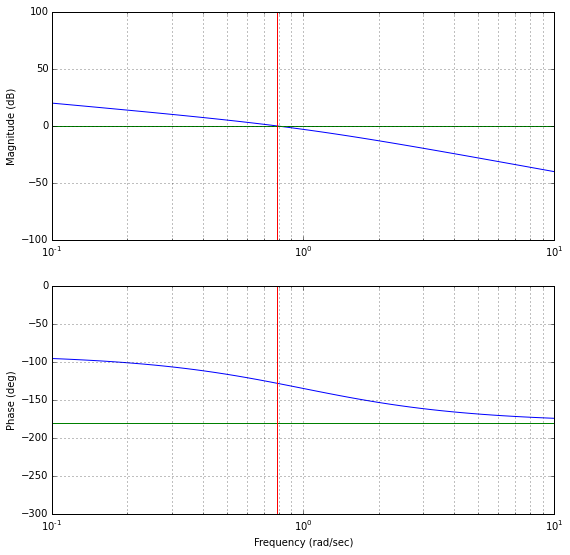

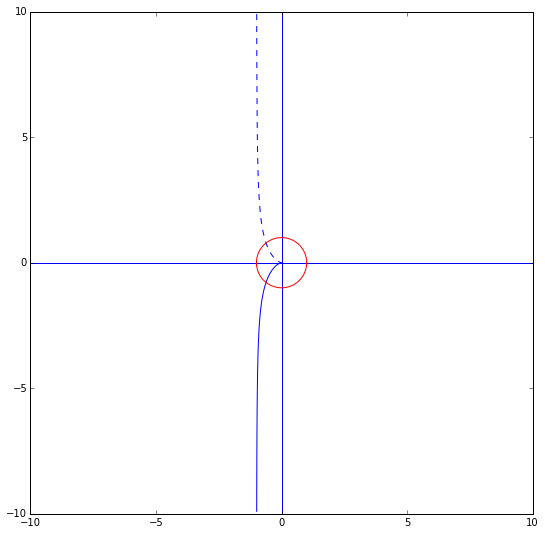

In [10]:
%matplotlib inline

keep_going = None
    # Blijf prompten tot correcte input
while keep_going != "Y" and keep_going != "y" and keep_going != "n" and keep_going !="N":
    keep_going = raw_input("(Y/N)? ")
    Showbode = True
    if keep_going == "N" or keep_going=="n":
        Showbode=False
###Showbode is a Boolean that says wheater you wan't to show the example or not.        
if Showbode==True:
    bode(TransferFunction([1],[1,1,0]),dB=True)
    gm,pm,x1,x2=margin(TransferFunction([1],[1,1,0]))   
    subplot(2,1,1)   
    plot([10**-1,10],[0,0])
    plot([x2,x2],[-100,100])
    subplot(2,1,2)
    plot([10**-1,10],[-180,-180])
    plot([x2,x2],[0,-300])
    fig= gcf()
    fig.set_size_inches(9,9)
    
    show ()
    nyquist_plot(TransferFunction([1],[1,1,0]),Plot=True, color='b', labelFreq=0)
    hold(True)
    axhline(0,0,1)
    axvline(0,0,1)
    plot(np.cos(np.linspace(0,2*pi,1000)),np.sin(np.linspace(0,2*pi,1000)),'r')
    
    fig= gcf()
    fig.set_size_inches(9,9)
    axis('equal')
    show ()
###These are commands to plot the Bode plot and the Nyquist plot and ad extra's such as axises and lines to                                                                                     
###show the phase margin.

<br>Let's try now to calculate the phase margin of a chosen transfer function.
<br>
<br>A hint, not all transfer functions have a phase margin, look carefull at the Bode plot first!
<br>
<br>Give in the coëfficiënts of the transfer function.          

Give in the numerator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= 1,1
Give in the denominator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= 1,2,4,2

        s + 1
---------------------
s^3 + 2 s^2 + 4 s + 2



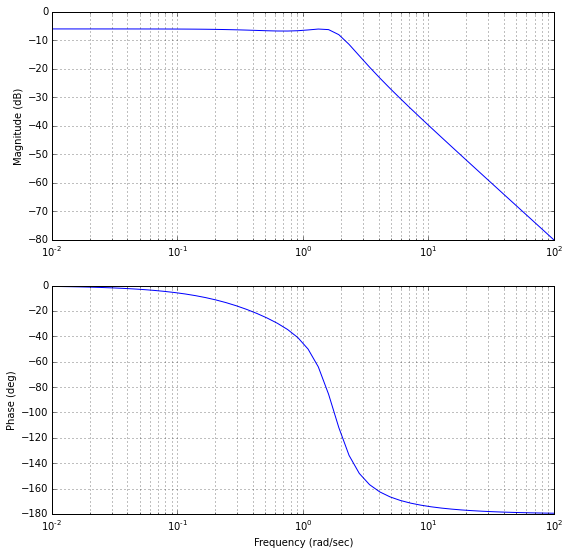

                                                               
Not all transfer functions are necessarily good transfer functions
                                                               
For example, if your phase plot of your Bode diagram doesn't come near the region of -180°,
                                                                  
it makes no sense to set a criteria like: I want to have 30 degrees  phase margin.
                                                               
So, do you want to continue with your given transfer function?
(Y/N)? y
                                                                                        
The phase margin is either very high, or it doesn't make sense to define the phase margin.


In [11]:
###These while-loops make sure that the user gives in the usefull input.
correct = False
while not correct:
    Nom = raw_input("Give in the numerator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= ")
    Nom = Nom.split(',')
    correct = True
    for k in range(len(Nom)):
        try:
            Nom[k] = float(Nom[k])
        except:
            correct = False    

correct = False
while not correct:
    DeNom = raw_input("Give in the denominator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= ")
    DeNom = DeNom.split(',')
    correct = True
    for k in range(len(DeNom)):
        try:
            DeNom[k] = float(DeNom[k])
        except:
            correct = False
TF = TransferFunction(Nom,DeNom)
gm,pm,x1,x2=margin(TF)
print TF
bode(TF,dB=True)
subplot(2,1,1)   
plot([10**-1,10],[0,0])
plot([x2,x2],[-100,100])
subplot(2,1,2)
plot([10**-1,10],[-180,-180])
plot([x2,x2],[0,-300])
fig= gcf()
fig.set_size_inches(9,9)
show ()
YN = False
###After plotting the transfer function, the user can see if it makes sense to continue 
###with the transfer function.
###The next loops are written if the user want's to change his/her transfer function and always plots
###the bode plot of the transfer function.
while YN == False:
    print "                                                               "
    print "Not all transfer functions are necessarily good transfer functions"
    print "                                                               "
    print "For example, if your phase plot of your Bode diagram doesn't come near the region of -180°,"
    print "                                                                  "
    print "it makes no sense to set a criteria like: I want to have 30 degrees  phase margin."
    print "                                                               "
    print "So, do you want to continue with your given transfer function?"
    keep_going = None
    # Blijf prompten tot correcte input
    while keep_going != "Y" and keep_going != "y" and keep_going != "n" and keep_going !="N":
        keep_going = raw_input("(Y/N)? ")
    if keep_going == "N" or keep_going=="n":
        YN=False
    else:
        YN=True
    if YN == False:
        correct = False
        while not correct:
            Nom = raw_input("Give in the numerator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= ")
            Nom = Nom.split(',')
            correct = True
            for k in range(len(Nom)):
                try:
                    Nom[k] = float(Nom[k])
                except:
                    correct = False
        correct = False            
        while not correct:
            DeNom = raw_input("Give in the denominator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= ")
            DeNom = DeNom.split(',')
            correct = True
            for k in range(len(DeNom)):
                try:
                    DeNom[k] = float(DeNom[k])  
                except:
                    correct = False
        TF = TransferFunction(Nom,DeNom)
        print TF
        gm,pm,x1,x2=margin(TF)   
        bode(TF,dB=True)
        subplot(2,1,1)   
        plot([10**-1,10],[0,0])
        plot([x2,x2],[-100,100])
        subplot(2,1,2)
        plot([10**-1,10],[-180,-180])
        plot([x2,x2],[0,-300])
        fig= gcf()
        fig.set_size_inches(9,9)
        show ()
### The next command show the phasemargin to the user        
GM,PM,X1,X2 = margin(TF)
if PM == None:
    print "                                                                                        "
    print "The phase margin is either very high, or it doesn't make sense to define the phase margin."
else:
    print "                    "
    print "The phase margin is, ",PM,"°"





<br> We calculated the phase margin at the beginning, when there was no controller yet.
<br>
<br> A proportional controller $C(s)$ has a certain constant value $K$, 
<br>
<br> that has an influence on the magnitude plot.(But not on the phase plot!)
<br>
<br> When you design a controller, a design objective for the controller can be: 
<br>
<br> "Design the controller in order that there is at least 30° degrees  phase margin."
<br>
<br> If we look at $H(s)= \frac{1}{(s^2+s)}$ again and let's say you want at least $30°$ phase margin, 
<br>
<br> the maximum value for $K$ is $3.46$. How do we find this $K$?
<br>
<br> First, find on the phase plot the frequency at which the phase plot equals $-150°$.
<br>
<br> Then, see what the amplitude at that frequency is. With that amplitude,$ K$ kan 
<br>
<br> easily be calculated. Since the $amplitude = 20*log_{10}(K)$, $K = 10^{\frac{amplitude}{20}}$.
<br>
<br> This gives $K=3.46$
<br>
<br> Do you want to calculate this yourself?

(Y/N)? y


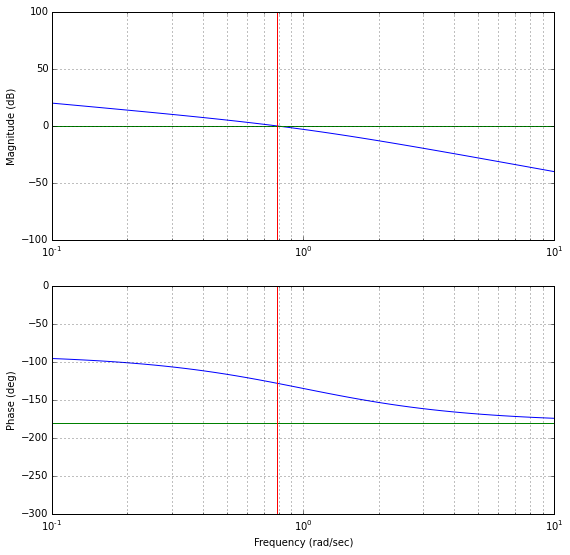

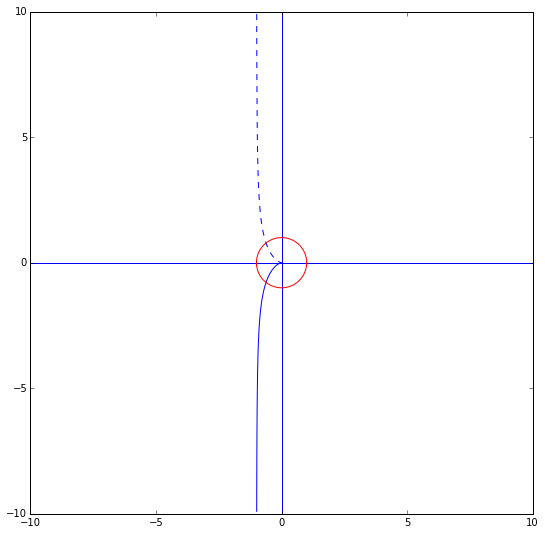

Now, let's do this calculation for your transferfunction.


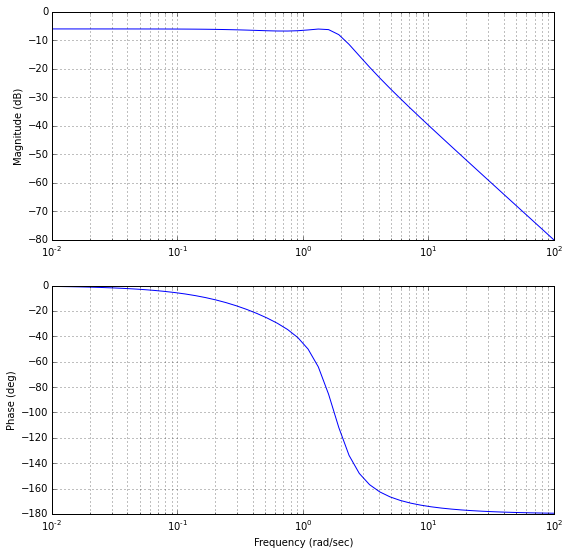

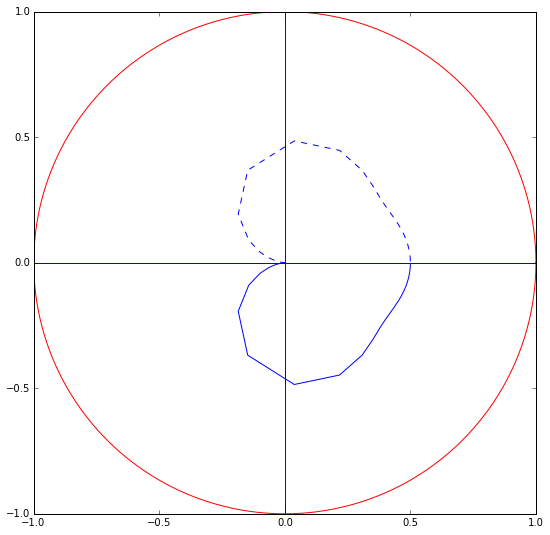

                                                                                   
If your given transfer function had a phasemargin that made sense (and higher then 30°), K should be:
                                        
6.407
                                   
For more exercices, see the demo Simplecontrollerdemo


In [12]:
###Some objective as the previous loops
keep_going = None
    # Blijf prompten tot correcte input
while keep_going != "Y" and keep_going != "y" and keep_going != "n" and keep_going !="N":
    keep_going = raw_input("(Y/N)? ")
    Showbode = True
    if keep_going == "N" or keep_going=="n":
        Showbode=False
if Showbode==True:
    gm,pm,x1,x2=margin(TransferFunction([1],[1,1,0]))   
    bode(TransferFunction([1],[1,1,0]),dB=True)
    subplot(2,1,1)   
    plot([10**-1,10],[0,0])
    plot([x2,x2],[-100,100])
    subplot(2,1,2)
    plot([10**-1,10],[-180,-180])
    plot([x2,x2],[0,-300])
    fig= gcf()
    fig.set_size_inches(9,9)
    show ()
    nyquist_plot(TransferFunction([1],[1,1,0]),Plot=True, color='b', labelFreq=0)
    hold(True)
    axhline(0,0,1)
    axvline(0,0,1)
    plot(np.cos(np.linspace(0,2*pi,1000)),np.sin(np.linspace(0,2*pi,1000)),'r')
    fig= gcf()
    fig.set_size_inches(9,9)
    axis('equal')
    show ()
###Shows Bode plot and Nyquist of the transfer function given in by the user, with extra axises and lines
###to make it easier to see how you calculate the phasemargin.
print "Now, let's do this calculation for your transferfunction." 
gm,pm,x1,x2=margin(TF)   
bode(TF,dB=True)
subplot(2,1,1)   
plot([10**-1,10],[0,0])
plot([x2,x2],[-100,100])
subplot(2,1,2)
plot([10**-1,10],[-180,-180])
plot([x2,x2],[0,-300])
fig= gcf()
fig.set_size_inches(9,9)
show ()
nyquist_plot((TF),Plot=True, color='b', labelFreq=0)
hold(True)
axhline(0,0,1)
axvline(0,0,1)
plot(np.cos(np.linspace(0,2*pi,1000)),np.sin(np.linspace(0,2*pi,1000)),'r')
fig= gcf()
fig.set_size_inches(9,9)
show ()
print "                                                                                   "
print "If your given transfer function had a phasemargin that made sense (and higher then 30°), K should be:"
if PM == None:
    PM = 10000
PMS = 30
teller = 0
K = 1
### Algorithm for calculating the K from the controller.
while abs(PM-PMS)>0.1 and PM>PMS and teller<50:
    if PM > 60+PMS:
        K = K*3
        teller+=1
    else:
        if PM > 45+PMS:
            K = K*2
            teller+=1
        else: 
            if PM > 20+PMS:
                K= K+2
            else:
                if PM > 10+PMS:
                    K= K+1
                else:
                    if PM > 5+PMS:
                        K = K+0.5                      
    GM,PM,X1,X2=margin(K*TF)
    if PM == None:
        PM =10000
    K = K+0.001
###Output for the user about the K of his/her  controller    
if teller != 50:
    print "                                        "
    print K
    
if teller == 50:
    print "                                   "
    print "Transferfunction doesn't make sense"
print "                                   "
print "For more exercices, see the demo Simplecontrollerdemo"